<a href="https://colab.research.google.com/github/Venkat-dev-cloud/Airline-Passengers-Traffic/blob/main/Airline_Passengers_Traffic_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting on Airline Passengers Traffic data

# Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Import time series data: Airline Passenger Traffic

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Data Science/Python/Machine Learning 2/Time Series Forecasting - I/Introduction to Time Series/airline-passenger-traffic.csv",
                   header=None)

In [9]:
data.columns=['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')

In [10]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


# Time Series Analysis

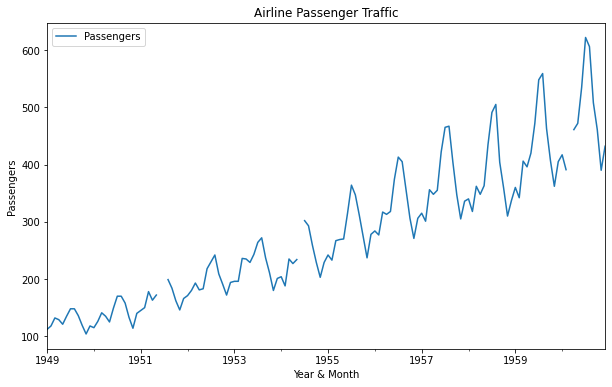

In [11]:
data.plot(figsize=[10,6], title='Airline Passenger Traffic')
plt.ylabel('Passengers')
plt.xlabel('Year & Month')
plt.show()

# Missing Value Treatment

We can see missing values in 1951, 1954 and 1960

## Mean Imputation

In [12]:
data = data.assign(Passengers_Mean_Imputation=data['Passengers'].fillna(data['Passengers'].mean()))

In [13]:
print(f"Mean value of Passengers is: {data['Passengers'].mean()}")

Mean value of Passengers is: 280.73571428571427


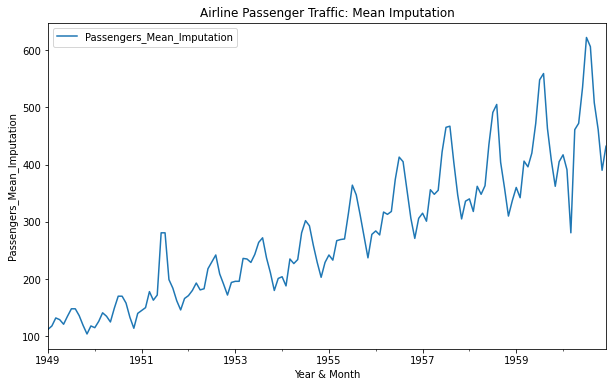

In [14]:
data[['Passengers_Mean_Imputation']].plot(figsize=[10,6], title='Airline Passenger Traffic: Mean Imputation')
plt.ylabel('Passengers_Mean_Imputation')
plt.xlabel('Year & Month')
plt.show()

* We can see that the mean value 280 is way above the expected value in 1951 and 1954.
* Similarly, for 1969, the mean value 280 is way below expectations.
* It would be prudent then, to try other imputation methods.

## Linear Imputation

In [15]:
data = data.assign(Passengers_Linear_Interpolation=data['Passengers'].interpolate(method="linear"))

In [16]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


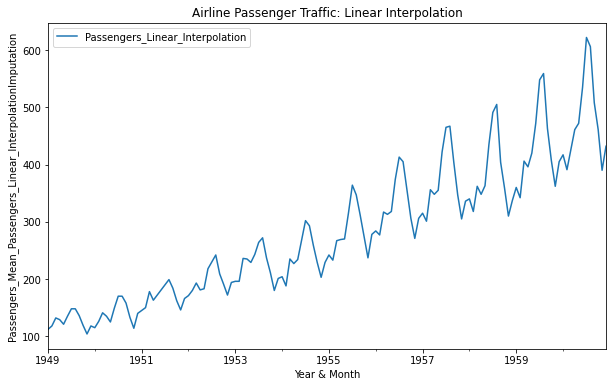

In [17]:
data[['Passengers_Linear_Interpolation']].plot(figsize=[10,6], title='Airline Passenger Traffic: Linear Interpolation')
plt.ylabel('Passengers_Mean_Passengers_Linear_InterpolationImputation')
plt.xlabel('Year & Month')
plt.show()

This trend seems much better compared to mean imputation and is accurate. We will choose to go ahead with Linear Interpolation

## Use Linear Interpolation to impute missing values

In [18]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

In [19]:
# Drop the Mean and Linear Interpolation columns
data.drop(columns=['Passengers_Mean_Imputation', 'Passengers_Linear_Interpolation'], inplace=True)

In [20]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


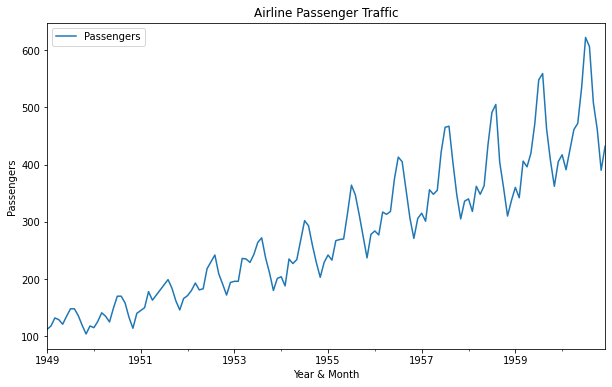

In [21]:
# Plotting Time-Series Analysis again
data.plot(figsize=[10,6], title='Airline Passenger Traffic')
plt.ylabel('Passengers')
plt.xlabel('Year & Month')
plt.show()

# Outlier Detection

## Box Plot and Inter-Quartile range

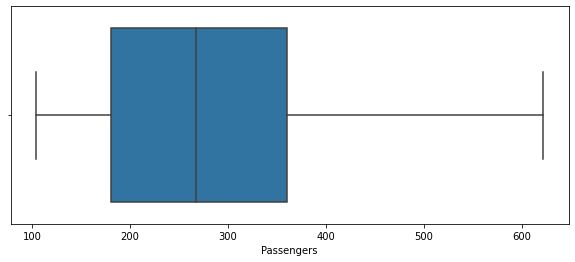

In [26]:
fig = plt.subplots(figsize=[10,4])
ax = sns.boxplot(x='Passengers', data=data, whis=1.5)
plt.show()
# Reducing whis=1 shows 4 outliers. We will keep default whis=1.5 as there is no break in the pattern for these 4 records to be treated as outliers

## Histogram Plot


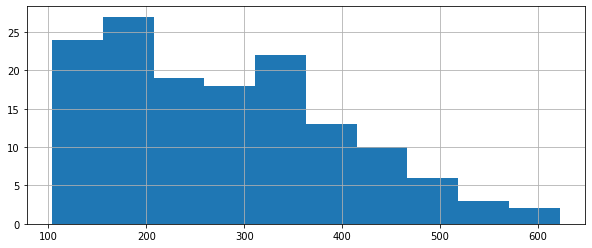

In [27]:
fig = data['Passengers'].hist(figsize=[10,4])
plt.show()

There are no outliers in the dataset

# Time Series Decomposition

## Additive Seasonal Decomposition

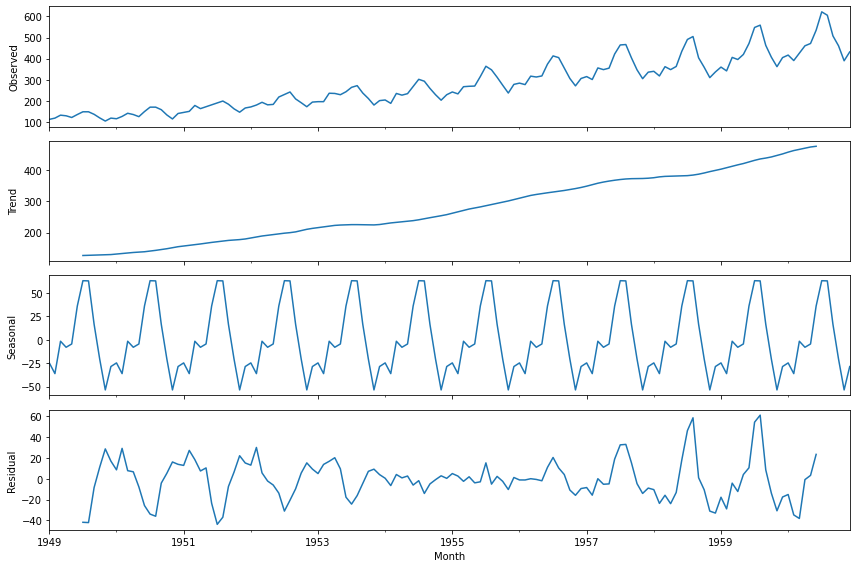

In [30]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

There is still trend shown in residuals.

## Multiplicative Seasonal Decomposition

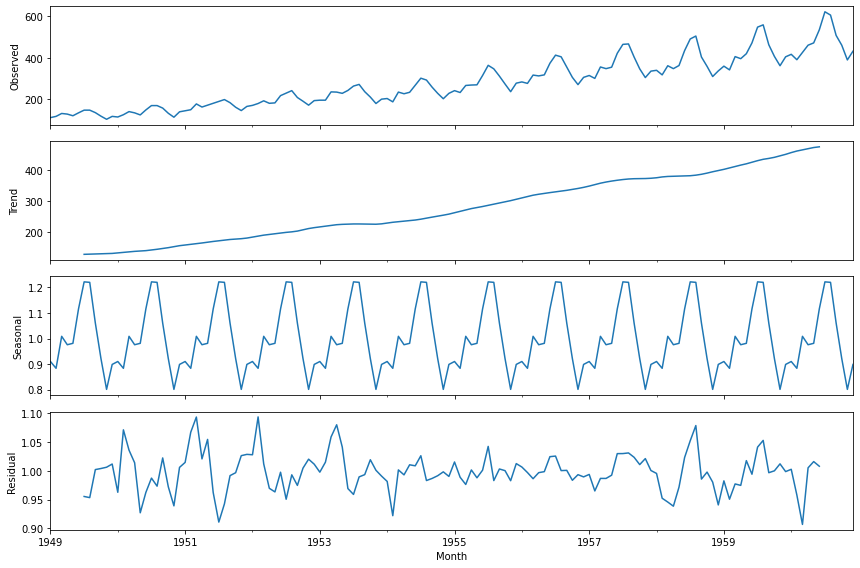

In [31]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [23]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
